> **Target :** Our Target for this project is to build an end to end application which can predict the price of cars based on some given input features.

In [24]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Reading Our Dataset
df=pd.read_csv('car data.csv')

In [26]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Basic Checkings

In [27]:
df.shape

(301, 9)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
#Checking the categorical data
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [30]:
#Missing Values Checking
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [31]:
#Checking the basic statistical details
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [32]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [33]:
ndf=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
#Omited the car name as there are too many unique values.. Might not be helpful..Can try seperately..

In [34]:
ndf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Feature Engineering

In [35]:
ndf['car_age']=2022-ndf['Year']
#It will help to check the age of the car.

In [36]:
ndf.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [37]:
ndf.drop(columns=['Year'],axis=1,inplace=True)

In [38]:
ndf.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [39]:
#Now let's convert categorical features into numerical features by using pd.get_dummies() method.

In [52]:
final_df=pd.get_dummies(ndf,drop_first=True)

In [53]:
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<AxesSubplot:>

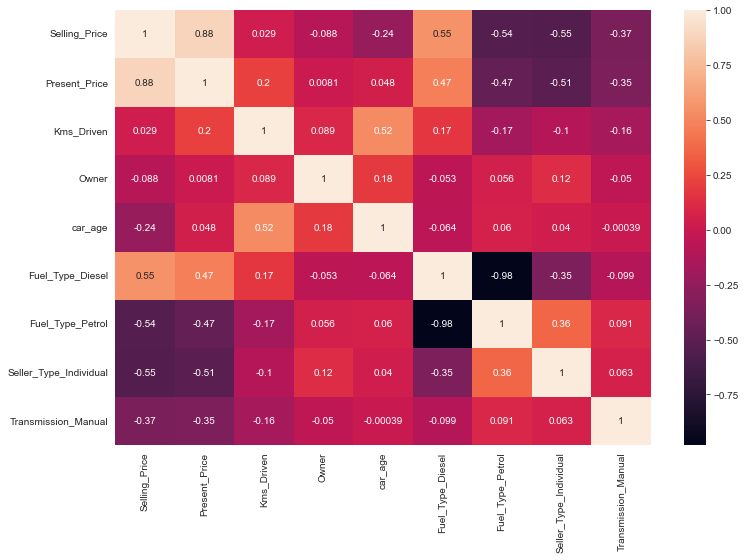

In [57]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
#Checking for coorelation with Heatmap
sns.heatmap(final_df.corr(),annot=True)

In [59]:
#Dividing the dataset into dependent and independent feature.
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [60]:
X.head(2)

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1


In [61]:
y.head(2)

0    3.35
1    4.75
Name: Selling_Price, dtype: float64

In [62]:
### Finding out important features..
from sklearn.ensemble import ExtraTreesRegressor

In [64]:
ex_model=ExtraTreesRegressor()
ex_model.fit(X,y)

ExtraTreesRegressor()

In [73]:
print((ex_model.feature_importances_))

[4.18259689e-01 4.12307519e-02 3.64689421e-04 7.63698807e-02
 2.19779858e-01 8.21486686e-03 1.18317740e-01 1.17462524e-01]


In [66]:
print(ex_model.feature_names_in_)

['Present_Price' 'Kms_Driven' 'Owner' 'car_age' 'Fuel_Type_Diesel'
 'Fuel_Type_Petrol' 'Seller_Type_Individual' 'Transmission_Manual']


In [80]:
for i in ex_model.feature_importances_:
    print(round(i*100),end='|')

42|4|0|8|22|1|12|12|

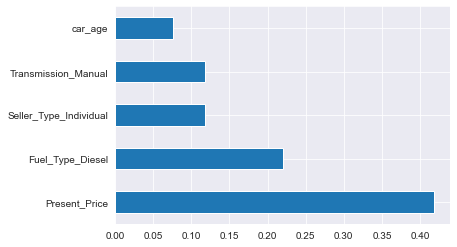

In [89]:
### Ploting Graphs to find out top 5 important featrues
feature_importance=pd.Series(data=ex_model.feature_importances_,index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

### Model Building

In [90]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [93]:
X_train.shape

(240, 8)

In [94]:
###We are going to use RandomForest model that is why scaling is not required.
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

### Hyperparameters Tunning

In [97]:
###Randomized Search CV
#Number of trees in the Random Forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#Number of features to consider at every split
max_features=["sqrt", "log2", "auto"]
#Maximum number of levels in trees
max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=6)]
#Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [100]:
###Performing Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [98]:
#Creating Random Grid
rand_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf    
}
print(rand_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2', 'auto'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [99]:
#Use the rand_grid to search for the best hyperparameters
#First create the base model to tune
rf=RandomForestRegressor()

In [101]:
#Applying Randomized Search CV
rf_rand=RandomizedSearchCV(
estimator=rf,
param_distributions=rand_grid,
scoring='neg_mean_squared_error',
n_iter=10,
cv=5,
verbose=2,random_state=42,
n_jobs=1)

In [102]:
rf_rand.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimato

C:\Users\MADHUMITA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\MADHUMITA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\MADHUMITA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\MADHUMITA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\MADHUMITA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.9s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.8s
[CV] END max_depth=25, max_features=log2, min_samples_leaf=1, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=400; total time=   0.5s
[CV] END max_depth=25, max_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [103]:
rf_rand.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 15}

In [104]:
rf_rand.best_score_

-4.182871826218948

In [105]:
pred=rf_rand.predict(X_test)

In [106]:
pred

array([ 0.64095   , 10.39223333,  5.16566667,  0.24503333,  7.21718333,
        6.30441667,  1.01755805,  0.59226667,  0.48350833,  6.33758333,
       10.2421    ,  0.93137424,  7.797     ,  0.58918333,  5.406     ,
        2.8636625 ,  1.03446869, 12.04781667,  0.57400238,  1.4952    ,
        0.48039167,  8.46611667,  5.65      ,  2.73458333,  0.53167538,
        3.62776991,  5.21775   ,  3.14035714,  1.24733333,  1.11097472,
        0.58931528,  9.5656    ,  0.44951667,  2.57895   ,  7.99021667,
        4.14390394,  6.21693333,  5.05371667,  2.98077083,  5.57725   ,
        4.10003333,  3.9883    ,  4.97557341,  0.535575  ,  6.71308333,
        0.60635   ,  7.44103333,  6.88441667,  3.1209    ,  3.69975   ,
        5.23815625,  1.41181667, 21.06885   , 20.89938333,  6.69525   ,
        9.14711667,  5.1842125 ,  8.99445   ,  2.58068333,  7.17556667,
        0.28225833])

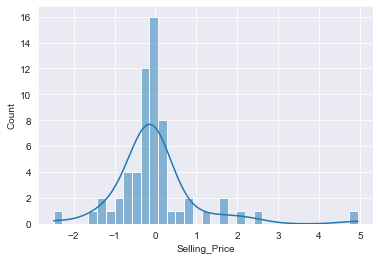

In [117]:
#Ploting the difference between the actual output value and predicted value..
#If the difference forms a normal distribution that means our model is performing very well.
sns.histplot(y_test-pred,kde=True)
plt.show()

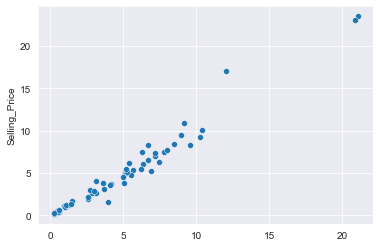

In [122]:
sns.scatterplot(x=pred,y=y_test)
plt.show()
#As the datapoints are almost forming a straight line like structure that is why 
#We can say that our predictions are matching with the actual results.

### Model's Performance Checking

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [134]:
print('MAE:',mean_absolute_error(y_test,pred))
print('MSE:',mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score:',r2_score(y_test,pred))

MAE: 0.5892576240153288
MSE: 1.02086663397736
RMSE: 1.0103794504924177
r2_score: 0.9556830592651921


### Pickling Our Model:

In [135]:
import pickle
#Opening a file where we want to store our model in a serialized format and dumping the model init
pickle.dump(rf_rand,open('reg_model.pkl','wb'))